In [7]:
using Revise
@time using DEBBase
@time using DoseResponse
using Plots, StatsPlots, Plots.Measures
default(leg = false, titlefontsize = 12, legendtitlefontsize = 10, lw = 1.5)

  0.001470 seconds (456 allocations: 30.617 KiB)
  0.001429 seconds (457 allocations: 30.688 KiB)


## Single stressor, single PMoA

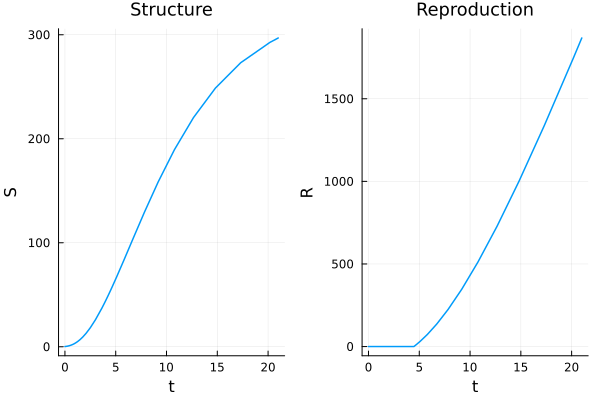

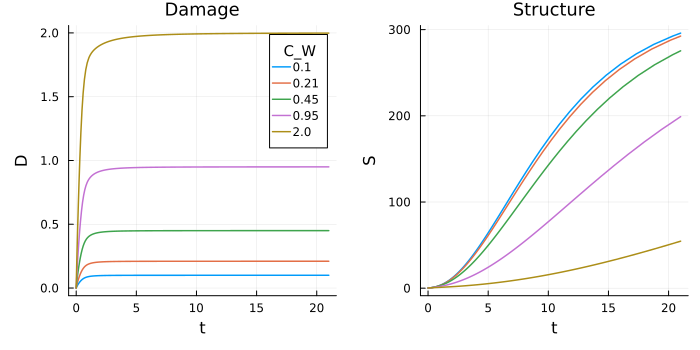

In [33]:
glb = GlobalBaseParams()
deb = DEBBaseParams(k_D_G = [1.], drc_params_G = [(1., 2.)])

isolate_pmoas!(deb, ["G"])
out = [
    simulator(BaseParams(glb = GlobalBaseParams(C_W = [C_W]), deb = deb)) for C_W in round.(10 .^ range(log10(0.1), log10(2.), length = 5), sigdigits = 2)
    ] |>
x -> vcat(x...)

@df out plot(
    plot(:t, :D_G_1, group = :C_W_1, ylabel = "D", title = "Damage", leg = true, legendtitle = "C_W"),
    plot(:t, :S, group = :C_W_1, ylabel = "S", title = "Structure"), 
    xlabel = "t", size = (700,350), bottommargin = 5mm, leftmargin = 5mm
)